In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
df = pd.read_csv('C://Users//Poulami//Desktop//repo//heal.csv', engine='python',
                 usecols=['name','group','year', 'value'])
df.head(3)

,name,group,year,value
0,Angola,Sub-Saharan Africa,2000,12.963032
1,Andorra,Europe,2000,2050.647461
2,United Arab Emirates,Middle East,2000,781.816711


In [3]:
pd.unique(df.year)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [4]:
current_year = 2000
dff = (df[df['year'].eq(current_year)]
       .sort_values(by='value', ascending=False)
       .head(10))
dff

,name,group,year,value
170,United States,North America,2000,4560.055176
28,Switzerland,Europe,2000,3737.802979
122,Norway,Europe,2000,2948.931641
98,Luxembourg,Europe,2000,2893.994141
76,Iceland,Europe,2000,2873.848145
81,Japan,East Asia,2000,2740.465088
44,Denmark,Europe,2000,2496.047119
41,Germany,Europe,2000,2334.651855
7,Austria,Europe,2000,2263.490479
152,Sweden,Europe,2000,2173.193848


<BarContainer object of 10 artists>

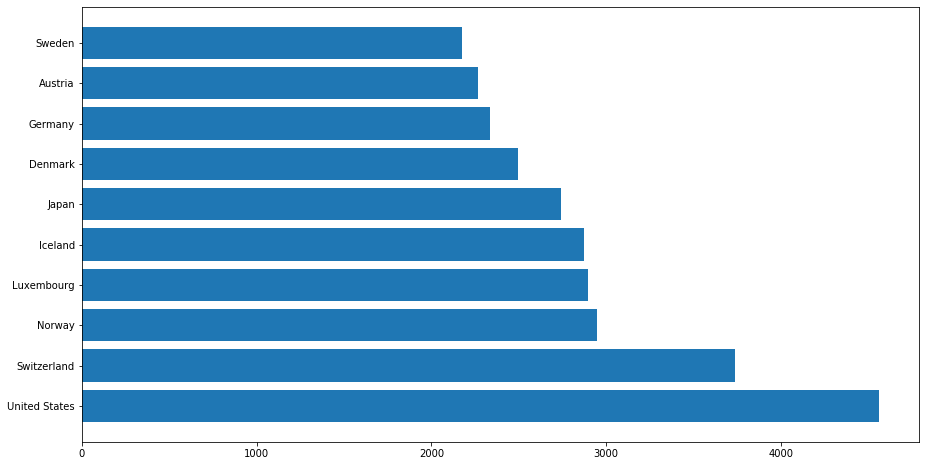

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])


In [6]:
colors = dict(zip(
    ['Sub-Saharan Africa','Europe ','Middle East ','Latin America ','East Asia ','South Asia','North America'],
    ['#adb0ff', '#eafb50','#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50','#f7bb5f', '#eafb50','#e48381']
))
group_lk = df.set_index('name')['group'].to_dict()

Text(1, 0.4, '2000')

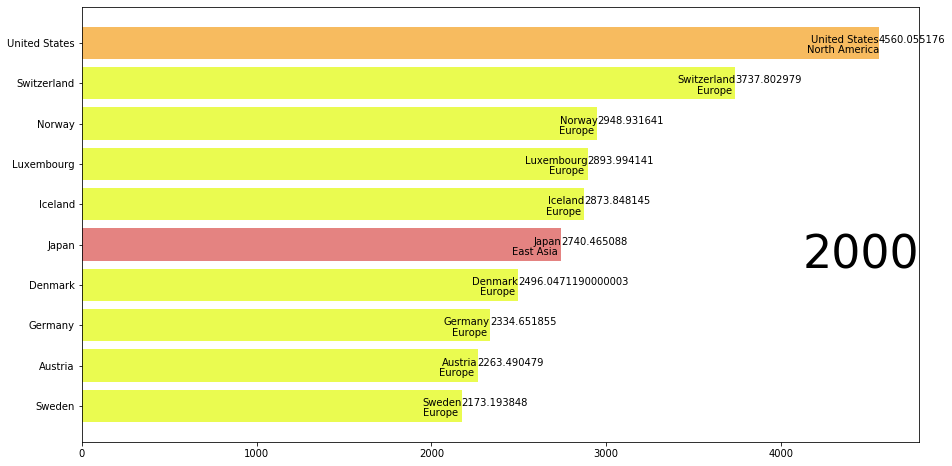

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

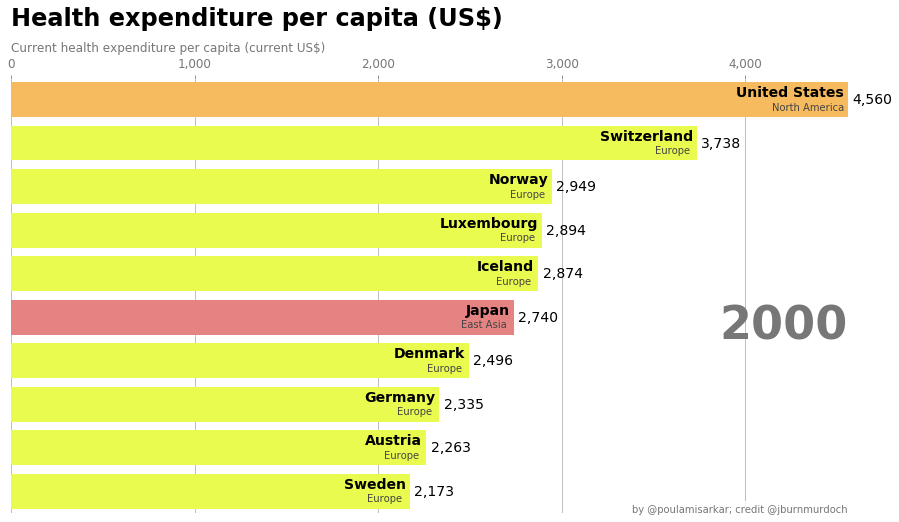

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Current health expenditure per capita (current US$)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Health expenditure per capita (US$)',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @poulamisarkar; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2000)


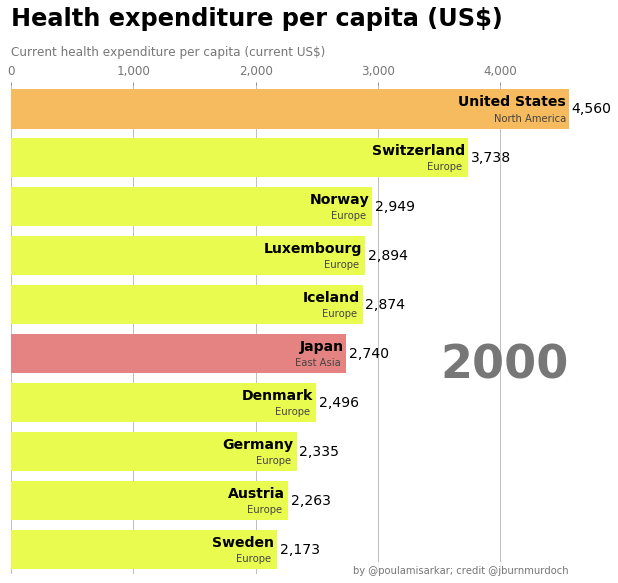

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(10, 9))

animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2000, 2018))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()
